회귀분석(regression analysis)은  𝐷 차원 벡터 독립 변수  𝑥 와 이에 대응하는 스칼라 종속 변수  𝑦 간의 관계를 정량적으로 찾아내는 작업이다.

###### 회귀분석에는 결정론적 모형(deterministic Model)과 확률적 모형(probabilistic Model)이 있다. 

###### 우선 결정론적 모형부터 설명한다. 

결정론적 회귀분석 모형은 독립 변수  𝑥 에 대해 대응하는 종속 변수  𝑦 와 가장 비슷한 값  𝑦̂  를 출력하는 함수  𝑓(𝑥) 를 찾는 과정이다.

$$\hat{y} = f \left( x \right) \approx y$$

만약 독립 변수  𝑥 와 이에 대응하는 종속 변수  𝑦 간의 관계가 다음과 같은 선형 함수  𝑓(𝑥) 이면 선형 회귀분석(linear regression analysis)이라고 한다.

$$\hat{y} = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_D x_D = w_0 + w^Tx$$

위 식에서  𝑤0,⋯,𝑤𝐷 를 함수  𝑓(𝑥) 의 계수(coefficient)이자 이 선형 회귀모형의 모수(parameter)라고 한다.

## 상수항 결합

상수항이 0이 아닌 회귀분석모형인 경우에는 수식을 간단하게 만들기 위해 다음과 같이 상수항을 독립변수에 추가한다. 이를 상수항 결합(bias augmentation)작업이라고 한다.

$$x_i =
\begin{bmatrix}
x_{i1} \\ x_{i2} \\ \vdots \\ x_{iD}
\end{bmatrix}
\rightarrow 
x_{i,a} =
\begin{bmatrix}
1 \\ x_{i1} \\ x_{i2} \\ \vdots \\ x_{iD}
\end{bmatrix}$$

상수항 결합을 하게 되면 모든 원소가 1인 벡터가 입력 데이터 행렬에 추가된다.

$$X =
\begin{bmatrix}
x_{11} & x_{12} & \cdots & x_{1D} \\
x_{21} & x_{22} & \cdots & x_{2D} \\
\vdots & \vdots & \vdots & \vdots \\
x_{N1} & x_{N2} & \cdots & x_{ND} \\
\end{bmatrix}
\rightarrow 
X_a =
\begin{bmatrix}
1 & x_{11} & x_{12} & \cdots & x_{1D} \\
1 & x_{21} & x_{22} & \cdots & x_{2D} \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
1 & x_{N1} & x_{N2} & \cdots & x_{ND} \\
\end{bmatrix}$$

이렇게 되면 전체 수식이 다음과 같이 상수항이 추가된 가중치 벡터  𝑤 와 상수항이 추가된 입력 데이터 벡터  𝑥 의 내적으로 간단히 표시된다.

$$f(x) = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_D x_D
= 
\begin{bmatrix}
1 & x_1 & x_2 & \cdots & x_D
\end{bmatrix}
\begin{bmatrix}
w_0 \\ w_1 \\ w_2 \\ \vdots \\ w_D
\end{bmatrix}
= x_a^T w_a = w_a^T x_a$$

상수항이 0이 아닌 경우에는 항상 상수항 결합을 하기 때문에 특별히 벡터 기호를  𝑥𝑎  또는  𝑤𝑎 라고 표시하지 않아도 상수항 결합이 되어 있는 경우가 많다.

다음은 상수항 결합을 하는 코드 예제이다.

In [1]:
import matplotlib.pylab as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 12

path = "/Library/Fonts/NanumGothic.otf"
font_name = fm.FontProperties(fname=path, size=20).get_name()

plt.rc('font', family=font_name)

In [2]:
from sklearn.datasets import make_regression

X0, y, coef = make_regression(n_samples=100, n_features=2, bias=100, noise=10, coef=True, random_state=1)

In [4]:
# 원래 데이터
X0[:5]

array([[ 0.0465673 ,  0.80186103],
       [-2.02220122,  0.31563495],
       [-0.38405435, -0.3224172 ],
       [-1.31228341,  0.35054598],
       [-0.88762896, -0.19183555]])

In [5]:
# 상수항 결합
X = np.hstack([np.ones((X0.shape[0], 1)), X0])
X[:5]

array([[ 1.        ,  0.0465673 ,  0.80186103],
       [ 1.        , -2.02220122,  0.31563495],
       [ 1.        , -0.38405435, -0.3224172 ],
       [ 1.        , -1.31228341,  0.35054598],
       [ 1.        , -0.88762896, -0.19183555]])

statsmodels에는상수항 결합을 위한 add_constant 함수가 제공된다.

In [7]:
import statsmodels.api as sm

X = sm.add_constant(X0)
X[:5]

array([[ 1.        ,  0.0465673 ,  0.80186103],
       [ 1.        , -2.02220122,  0.31563495],
       [ 1.        , -0.38405435, -0.3224172 ],
       [ 1.        , -1.31228341,  0.35054598],
       [ 1.        , -0.88762896, -0.19183555]])

## OLS

###### OLS(Ordinary Least Squares)는 가장 기본적인 결정론적 선형 회귀 방법으로 

##### 잔차제곱합(RSS: Residual Sum of Squares)을 최소화하는 가중치 벡터를 행렬 미분으로 구하는 방법이다.

우리가 사용하는 예측 모형은 다음과 같이 상수항이 결합된 선형 모형이다.

$$\hat{y} = Xw$$

이때 잔차 벡터(residual vector)  𝑒 는

$$e = {y} - \hat{y} = y - Xw$$

이고 잔차 제곱합(RSS:residual sum of squares)은

\begin{eqnarray}
\text{RSS}
&=&  e^Te \\
&=& (y - Xw)^T(y - Xw) \\
&=& y^Ty - 2y^T X w + w^TX^TXw  
\end{eqnarray}

이다. 잔차의 크기 즉, 잔차 제곱합을 가장 작게 하는 가중치 벡터를 구하기 위해 잔차 제곱합의 그레디언트(gradient) 벡터를 구하면 다음과 같다.

$$\dfrac{d \text{RSS}}{d w} = -2 X^T y + 2 X^TX w$$

잔차가 최소가 되는 최적화 조건은 그레디언트 벡터가 0벡터이어야 하므로 다음 식이 성립한다.

$$\dfrac{d \text{RSS}}{d w}  = 0$$

$$X^TX w^{\ast} = X^T y$$

만약  𝑋𝑇𝑋  행렬의 역행렬이 존재한다면 다음과 같이 최적 가중치 벡터  𝑤∗ 를 구할 수 있다.

$$w^{\ast} = (X^TX)^{-1} X^T y$$

𝑋𝑇𝑋  행렬의 역행렬이 존재하고 위에서 구한 값이 최저값이 되려면  𝑋𝑇𝑋 가 양의 정부호(positive definite) 행렬이어야 한다. 만약  𝑋 가 풀랭크가 아니면 즉,  𝑋 의 각 행렬이 서로 독립이 아니면  𝑋𝑇𝑋 가 양의 정부호가 아니고 역행렬이 존재하지 않으므로 위와 같은 해를 구할 수 없다.

## 직교 방정식

여기에서 그레디언트가 0벡터가 되는 관계를 나타내는 다음 식을 직교 방정식(normal equation)이라고 한다.

$$X^T y - X^TX w = 0$$

직교 방정식을 인수 분해하면

$$X^T (y - X w ) = 0$$

$$X^T e = 0$$

즉,  𝑐𝑑 가 모든 데이터의  𝑑 번째 차원의 원소로 이루어진 데이터 벡터(특징 행렬의 열벡터)라고 할 때 모든 차원  𝑑(𝑑=0,…,𝐷) 에 대해  𝑐𝑑 는 잔차 벡터  𝑒 와 수직을 이룬다.

$$c_d^T e = 0 \;\;\; (d=0, \ldots, D)$$

또는

$$c_d \perp e \;\;\; (d=0, \ldots, D)$$

직교 방정식으로부터 다음과 같은 성질을 알 수 있다.

(1) 모형에 상수항이 있는 경우에 잔차 벡터의 원소의 합은 0이다. 즉, 잔차의 평균은 0이다.

$$\sum_{i=0}^N e_i = 0$$

(2)  𝑥  데이터의 평균값  𝑥¯ 에 대한 예측값은  𝑦  데이터의 평균값  𝑦¯ 이다.

$$\bar{y} = w^T \bar{x}$$

1번 성질은 상수항 결합이 되어 있으면  𝑋 의 첫번째 열이 1-벡터라는 것을 이용하여 증명할 수 있다.

$$c_0^T e = \mathbf{1}^T e = \sum_{i=0}^N e_i = 0$$

2번 성질은 다음처럼 증명한다.

\begin{eqnarray}
\bar{y} 
&=& \dfrac{1}{N}\mathbf{1}^T y \\
&=& \dfrac{1}{N}\mathbf{1}^T (Xw + e) \\
&=& \dfrac{1}{N}\mathbf{1}^TXw + \dfrac{1}{N}\mathbf{1}^Te \\
&=& \dfrac{1}{N}\mathbf{1}^TXw \\
&=& \dfrac{1}{N}\mathbf{1}^T \begin{bmatrix}c_1 & \cdots & c_M \end{bmatrix} w \\
&=& \begin{bmatrix}\dfrac{1}{N}\mathbf{1}^Tc_1 & \cdots & \dfrac{1}{N}\mathbf{1}^Tc_D \end{bmatrix} w \\
&=& \begin{bmatrix}\bar{c}_1 & \cdots & \bar{c}_D \end{bmatrix} w \\
&=& \bar{x}^T w \\
\end{eqnarray}

## NumPy를 이용한 선형 회귀분석

이제 NumPy의 선형대수 기능을 사용하여 OLS 방법으로 선형 회귀분석을 해보자. 우선 make_regression 명령을 사용하여 다음과 같이 1차원 특징 데이터 x와 이 값에 의존하는 y를 만든다.

In [8]:
from sklearn.datasets import make_regression

bias = 100
X0, y, w = make_regression(n_samples=200, n_features=1, bias=bias, noise=10, coef=True, random_state=1)

X = sm.add_constant(X0)
y.shape

(200,)

In [9]:
y = y.reshape(len(y), 1)
y.shape

(200, 1)

In [10]:
y[:5]

array([[127.87901739],
       [ 93.03291422],
       [161.8575084 ],
       [141.69205026],
       [283.26011945]])

우리가 준 bias 값은 100이고 make_regression 명령이 생성한 모수 값은 다음과 같다.

In [11]:
w

array(86.44794301)

따라서 x와 y는 다음과 같은 관계를 가진다.

$$y = 100 + 86.44794301 x + \epsilon$$

위에서 구한 수식을 이용하여 선형회귀 계수를 추정하면 다음과 같다.

In [12]:
# OLS 해를 직접 이용하는 방법
w = np.linalg.inv(X.T @ X) @ X.T @ y  # np.linalg.inv 역행렬 구하기, 𝑋𝑇𝑋𝑤=𝑋𝑇𝑦
w

array([[99.79150869],
       [86.96171201]])

따라서 x와 y는 다음과 같은 관계를 가진다.

$$\hat{y} = 99.79150869 + 86.96171201 x$$

이 결과에서 알 수 있는 것은 선형 회귀를 통해 구한 결과는 실제(자연 법칙)와 비슷하지만 정확하지는 않다는 점이다.

In [18]:
# lstsq 명령을 이용하는 방법
w = np.linalg.lstsq(X, y, rcond=None)[0]  
w

array([[99.79150869],
       [86.96171201]])

lstsq 명령은 행렬  𝐴 와  𝑏 를 모두 인수로 받고 뒤에서 설명할 최소자승문제(least square problem)의 답 x, 잔차제곱합(residual sum of squares) resid, 랭크(rank) rank, 특잇값(singular value) s를 반환한다.  lstsq 명령으로 구한 답이 inv 명령으로 구한 답과 같음

참고: np.linalg.lstsq https://datascienceschool.net/view-notebook/927d7f7972dd434ead9d294169ae7f34/

다음 코드는 여러가지 새로운  𝑥 값에 대해  𝑦̂  을 구해본 결과를 원래 데이터와 비교한 것이다.

In [20]:
x_new = np.linspace(np.min(X0), np.max(X0), 100)
X_new = sm.add_constant(x_new)
X0[:5], X_new[:5]

(array([[ 0.23249456],
        [-0.03869551],
        [ 0.5505375 ],
        [ 0.50318481],
        [ 2.18697965]]), array([[ 1.        , -2.43483776],
        [ 1.        , -2.3847048 ],
        [ 1.        , -2.33457184],
        [ 1.        , -2.28443887],
        [ 1.        , -2.23430591]]))

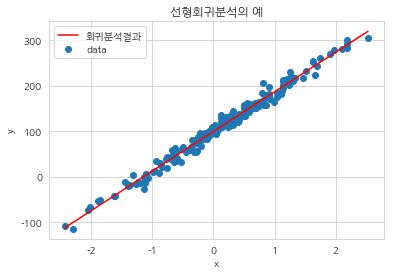

In [22]:
y_new = np.dot(X_new, w)

plt.scatter(X0, y, label="data")
plt.plot(x_new, y_new, 'r-', label="회귀분석결과")
plt.xlabel("x")
plt.ylabel("y")
plt.title("선형회귀분석의 예")
plt.legend()
plt.show()

## scikit-learn 패키지를 사용한 선형 회귀분석

scikit-learn 패키지를 사용하여 선형 회귀분석을 하는 경우에는 linear_model 서브 패키지의 LinearRegression 클래스를 사용한다. 사용법은 다음과 같다.

(1) LinearRegression 클래스 객체 생성

   + model = LinearRegression(fit_intercept=True)

       + fit_intercept 인수는 모형에 상수항이 있는가 없는가를 결정하는 인수이다. 
       + 디폴트 값이 True이고 만약 상수항이 없으면 fit_intercept=False로 설정한다.
    

(2) fit 메서드로 모형 추정. 상수항 결합을 자동으로 해주므로 사용자가 직접 add_constant 등의 명령를 써서 상수항 결합을 할 필요는 없다.

   + model = model.fit(X, y)

    회귀분석을 하고 나면 모형 객체는 다음과 같은 속성을 가지게 된다. 또한 fit 메서드는 객체 자신을 반환한다.

        + coef_ : 추정된 가중치 벡터
        + intercept_ : 추정된 상수항


(3) predict 메서드로 새로운 입력 데이터에 대한 출력 데이터 예측

   + y_new = model.predict(x_new)



위 예제를 LinearRegression 클래스로 선형회귀를 하면 다음과 같다.

In [24]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X0, y)  # 모형 추정
print(model.coef_, model.intercept_)

[[86.96171201]] [99.79150869]


predict 메서드를 사용하면 새로운  𝑥𝑛𝑒𝑤  값에 대응하는  𝑦  값을 예측할 수 있다.  𝑥𝑛𝑒𝑤 값으로 2차원 배열을 써야한다는 점을 주의한다.

In [25]:
model.predict([[3]])

array([[360.67664473]])

다음은 scikit-learn의 LinearRegression 클래스를 이용하여 보스턴 집값 데이터에 대해 회귀분석을 하는 예이다.

In [26]:
from sklearn.datasets import load_boston

boston = load_boston()
model_boston = LinearRegression().fit(boston.data, boston.target)

추정한 가중치 값은 다음과 같다. 특징 벡터의 이름과 비교하면 각각의 가중치가 가지는 의미를 알 수 있다. 예를 들어 방(RM) 하나가 증가하면 가격 예측치는 약 3,810달러 정도 증가한다는 것을 알 수 있다.

In [27]:
model_boston.coef_

array([-1.07170557e-01,  4.63952195e-02,  2.08602395e-02,  2.68856140e+00,
       -1.77957587e+01,  3.80475246e+00,  7.51061703e-04, -1.47575880e+00,
        3.05655038e-01, -1.23293463e-02, -9.53463555e-01,  9.39251272e-03,
       -5.25466633e-01])

In [28]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [29]:
model_boston.intercept_  # 추정된 상수항

36.49110328036104

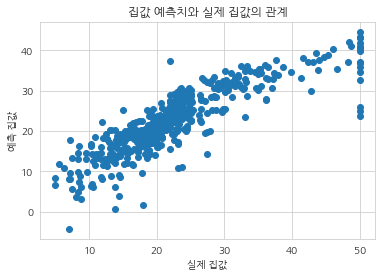

In [31]:
predictions = model_boston.predict(boston.data)

plt.scatter(boston.target, predictions)
plt.xlabel("실제 집값")
plt.ylabel("예측 집값")
plt.title("집값 예측치와 실제 집값의 관계")
plt.show()

## statsmodels 패키지를 사용한 선형 회귀분석

statsmodels 패키지에서는 OLS 클래스를 사용하여 선형 회귀분석을 실시한다. OLS 클래스 사용법은 다음과 같다.

1. OLS 클래스 객체 생성. 이 때 scikit-learn 패키지와 달리 데이터를 미리 주어야 하며 자동으로 상수항을 만들어주지 않기 때문에 사용자가 add_constant 명령으로 상수항을 추가해야 한다. 또한 인수의 순서가 scikit-learn 패키지와 달리 출력 데이터를 먼저 넣어야 한다.

    + model = OLS(y, X)
        
2. fit 메서드로 모형 추정. scikit-learn 패키지와 달리 추정 결과는 별도의 RegressionResults 클래스 객체로 출력된다.

    + result = model.fit()

3. RegressionResults 클래스 객체는 결과 리포트용 summary 메서드와 예측을 위한 prediction 메서드를 제공한다.

    + print(result.summary())
    + y_new = result.predict(x_new)

    이 때, 예측을 위한 데이터는 추정시와 동일하게 상수항 결합을 해 주어야 한다.

위 1차원 데이터 예제를 statsmodels의 OLS 명령으로 선형회귀를 하면 다음과 같다. summary 메서드는 복잡한 형태의 보고서를 보여주는데 보고서의 내용에 대해서는 확률적 회귀모형에서 자세히 설명한다.

In [32]:
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.278e+04
Date:                Mon, 12 Aug 2019   Prob (F-statistic):          8.17e-182
Time:                        10:00:40   Log-Likelihood:                -741.28
No. Observations:                 200   AIC:                             1487.
Df Residuals:                     198   BIC:                             1493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.7915      0.705    141.592      0.0

predict 메서드를 사용하면 새로운  𝑥𝑛𝑒𝑤  값에 대응하는  𝑦  값을 예측할 수 있다.  𝑥𝑛𝑒𝑤 값으로 상수항 결합이 된 2차원 배열을 써야한다는 점을 주의한다.

In [33]:
result.predict([[1, 3]])

array([360.67664473])

보스턴 집값 데이터를 statsmodels의 OLS 명령으로 분석한 결과는 다음과 같다.

In [34]:
import pandas as pd

dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

model_boston2 = sm.OLS(dfy, dfX)
result_boston2 = model_boston2.fit()
print(result_boston2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 12 Aug 2019   Prob (F-statistic):          6.95e-135
Time:                        10:11:25   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.0

예측을 할 때는 입력 데이터가 추정모형과 동일한 형태가 되어야 한다. 예를 들어 다음과 같은 입력데이터를 생각해보자. 이 데이터는 원래 입력데이터의 평균값이다.

In [35]:
x_new = dfX0.mean().values
x_new

array([3.59376071e+00, 1.13636364e+01, 1.11367787e+01, 6.91699605e-02,
       5.54695059e-01, 6.28463439e+00, 6.85749012e+01, 3.79504269e+00,
       9.54940711e+00, 4.08237154e+02, 1.84555336e+01, 3.56674032e+02,
       1.26530632e+01])

In [36]:
dfX0.mean()

CRIM         3.593761
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
dtype: float64

predict 명령의 인수로 들어가는  𝑥𝑛𝑒𝑤  데이터는 원래 회귀분석에 사용했던 X 데이터와 동일한 형태의 데이터를 만들어야 한다. 여기에서 알기 쉽게 데이터프레임의 형태로 만들었다. 데이터프레임을 만들 때 데이터 행이 하나인 경우에는 add_constant에 has_constant="add" 인수를 추가해야 한다.

In [38]:
dfx_new = sm.add_constant(pd.DataFrame(np.array(x_new)[:, np.newaxis].T, columns=boston.feature_names), has_constant="add")
dfx_new

const      CRIM         ZN      INDUS     CHAS       NOX        RM  \
0    1.0  3.593761  11.363636  11.136779  0.06917  0.554695  6.284634   

         AGE       DIS       RAD         TAX    PTRATIO           B      LSTAT  
0  68.574901  3.795043  9.549407  408.237154  18.455534  356.674032  12.653063

In [39]:
result_boston2.predict(dfx_new)

0    22.532806
dtype: float64

직교 방정식에서 증명했던 것처럼 이 예측값은 y 데이터의 평균과 같다.

In [40]:
dfy.mean() # 평균으로 만든 입력데이터를 넣어더니 마찬가지로 예측값도 y의 평균값을 도출 

MEDV    22.532806
dtype: float64

RegressionResults 클래스는 분석 결과를 다양한 속성에 저장해주므로 추후 사용자가 선택하여 활용할 수 있다. 자주 사용되는 속성으로는 다음과 같은 것들이 있다.

+ params: 가중치 벡터
+ resid: 잔차 벡터


가중치 벡터의 값은 다음과 같이 확인한다.

In [41]:
result_boston2.params

const      36.491103
CRIM       -0.107171
ZN          0.046395
INDUS       0.020860
CHAS        2.688561
NOX       -17.795759
RM          3.804752
AGE         0.000751
DIS        -1.475759
RAD         0.305655
TAX        -0.012329
PTRATIO    -0.953464
B           0.009393
LSTAT      -0.525467
dtype: float64

잔차 벡터의 형태는 다음과 같다.

In [43]:
type(result_boston2.resid)

pandas.core.series.Series

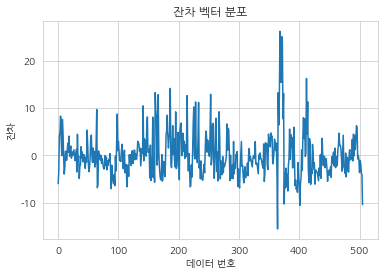

In [46]:
result_boston2.resid.plot()
plt.title("잔차 벡터 분포")
plt.xlabel("데이터 번호")
plt.ylabel("잔차")
plt.show()

직교 방정식에서 이끌어 낸 것처럼 잔차의 합은 0이 된다.

In [47]:
result_boston2.resid.sum()

1.6193268947972683e-11